<a href="https://colab.research.google.com/github/TacticalCoders/machine-learning/blob/main/Perch_Length_Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 농어 무게 예측 모델


상황이 바뀌었다. 

여름 농어 철로 농어의 주문이 늘어 농어를 무게 단위로 판매하려고 한다.

농어를 마리당 가격으로 팔았더니 품질이 낮은 농어를 받은 고객이 항의하는 일이 발생했기 때문이다. 그래서 무게 단위로 판매하려고 한다.

그런데 농어의 길이, 높이, 두께, 무게 데이터가 있는데, 무게 데이터가 잘못 측정된 상황이다.

**따라서 길이, 높이, 두께 데이터를 가지고 무게를 예측해야 하는 상황이다.**


이런 문제를 **회귀**라고 한다.

회귀역시 지도학습의 한 종류이기 때문에 정확한 데이터가 있어야 한다. 위 상황에서는 정확하게 측정한 농어 샘플이 필요하다.

### 회귀(**regression**)

지도 학습 알고리즘은 크게 분류와 회귀로 나뉜다.

분류는 샘플을 몇 개의 클래스 중 하나로 분류하는 것이고, 회귀는 **임의의 어떤 숫자를 예측하는** 것이다. 

다시 말해, **두 변수 사이의 상관관계를 분석하는 방법**이다.

예를 들어 내년도 경제 성장률 예측, 배달이 도착할 시간을 예측하는 것들이 회귀 문제이다. 



### k-최근접 이웃 회귀

k-최근접 이웃 **분류** 알고리즘은 예측할려는 샘플에 가장 가까운 샘플 k개를 선택하고. 그 샘플들의 클래스를 확인하여 다수인 클래스를 새로운 샘플의 클래스로 예측하는 것이다. 


k-최근접 이웃 **회귀** 알고리즘도 이와 비슷하다. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 하지만 회귀이기 때문에 이웃한 샘플의 타깃은 임의의 수치일 것이다. 이 수치들의 평균을 구한다면 x의 예측 타깃 값이 나오게 될 것이다


### 데이터 준비

우선 농어의 길이만으로 무게를 예측해보자.

바로 넘파이 배열로 데이터를 만들어보자.

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

길이를 입력하면 무게가 출력되는 모델을 만들고 싶은 것이다.

그래서 이 둘의 관계를 파악하기 위해 산점도로 그래프를 그려보자.

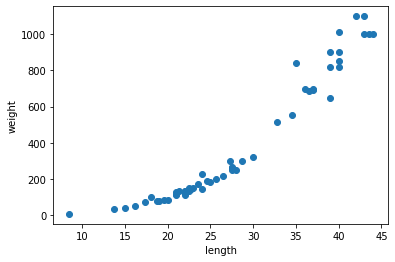

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이기 커질수록 무게도 늘어나는 비례적인 관계임을 확인할 수 있다.

#### 훈련 세트와 테스트 세트 나누기

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

사이킷런에서 **사용할 훈련 세트는 2차원 배열**이어야 한다.

도미, 빙어에서는 무게와 길이 두 특성이었기에 자연스럽게 2차원 배열을 사용했었다. 하지만 농어는 지금 길이 하나의 특성만 존재하기 때문에 이를 2차원 배열로 만들어 줘야 한다.

넘파이에서는 배열의 크기를 바꿀 수 있는 reshape()메서드를 제공한다.

In [6]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [8]:
# (4,) 배열을 (2,2)로 바꾸기

test_array = test_array.reshape(2,2) # 이때 바꾸고자 하는 배열의 개수가 같아야 한다.
print(test_array.shape)

(2, 2)


In [9]:
print(test_array)

[[1 2]
 [3 4]]


In [10]:
train_input = train_input.reshape(-1, 1) # -1을 전달하면 나머지 원소 개수의 배열들로 모두 채우게 된다.
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 훈련시키기

사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor이다. 

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

마잔기지로 fit으로 훈련시키고 score로 성능을 평가한다.

In [14]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

### 성능 평가

In [15]:
print(knr.score(test_input, test_target))

0.992809406101064


score가 분류에서는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율이었다.

회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능하다.(평균을 내서 값을 산출하기 때문에) 

따라서 결정계수(coefficient of determination), R^2라고도 하는 값을 사용한다.

#### **결정계수(R^2)**

결정계수는 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더한다. 그리고 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다. 이를 1에서 빼준다.

만약 타깃의 평균 정도를 예측한다면 분자와 분모가 비슷해져 0에 가까운 값이 나올것이다. **(예측 정확도 비교적 낮음)**

반대로 예측이 타깃에 아주 가까워지면 분자가 0에 가까워지기 때문에 1에 가까운 값이 된다. **(예측 정확도 비교적 높음)**

#### 어느정도 예측이 벗어났는지 가늠해보기

타깃과 모델이 예측한 값 사이의 차이를 구해보면 어느 정도 예측에서 벗어나는지 확인해볼 수 있다.

**sklearn.metrics** 패기지에서 여러 측정 도구를 제공하는데, 이 중 **mean_absolute_error**는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [16]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


타깃과 예측이 평균적으로 19g 정도 다르다는 것을 의미한다.

이 모델의 오차범위가 +/- 19g 정도 된다는 의미로도 해석할 수 있다.

앞서 훈련 세트로 훈련시킨 모델을 **훈련 세트**로 테스트 해보자.

In [17]:
print(knr.score(train_input, train_target))

0.9698823289099254


테스트 세트를 사용한 점수와 비교했을 때, 훈련 세트의 점수가 더 낮다. 상식적으로 훈련세트에서의 점수가 높아야 할 것 같은데 왜 이런 현상이 발생할까?

#### **과대적합 vs 과소적합**

훈련 세트로 모델을 훈련하면 당연히 훈련 세트에 잘 맞는 모델이 만들어진다. 

만약 훈련 세트에서는 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁘다면 모델이 훈련 세트에 **과대적합(overfitting)**되었다고 말한다.

쉽게 말해 훈련 세트에만 잘 맞는 모델이라 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않을 것이다.

반대로 ***훈련 세트보다 테스트 세트의 점수가 높거나*** ***두 점수가 모두 낮은 경우*** 모델이 훈련 세트의 **과소적합(underfitting)** 되었다고 말한다.

이는 모델이 너무 단순해 훈련 세트에 적절히 훈련되지 않은 것이다. 혹은 훈련 세트와 테스트 세트의 크기가 매우 작아도 과소적합된다.


보통 **훈련 세트가 전체 데이터를 대표**한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요하다.


위에서 만든 농어 모델은 테스트세트에서의 점수가 높으므로 과소적합되었다고 볼 수 있다.

### 모델 복잡하게 만들기

과소적합의 원인 중 하나는 모델이 너무 단순하기 때문이다. 따라서 모델을 조금 더 복잡하게 만들어 과소접합을 해결할 수 있다.

k-최근접 이웃 알고리즘으로 모델을 복잡하게 만들려면 k의 개수를 줄이면 된다.
이웃의 개수를 줄이면 훈련 세트에 있는 국지적 패턴에 민감해지기 때문이다.

k의 값을 3으로 낮춰보자.


In [23]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [24]:
print(knr.score(train_input, train_target))

0.9804899950518966


In [25]:
print(knr.score(test_input, test_target))

0.9746459963987609


이제야 테스트 세트의 점수가 훈련 세트보다 낮아졌다. 과소적합 문제를 해결한 것이다.

최적의 n(이웃 개수)을 찾는 방법은 5장에서 다룰 것이다.

In [27]:
knr.predict([[25]]) # 생선의 길이가 25cm라면 무게는?

array([200.66666667])

In [28]:
knr.predict([[50]])

array([1033.33333333])